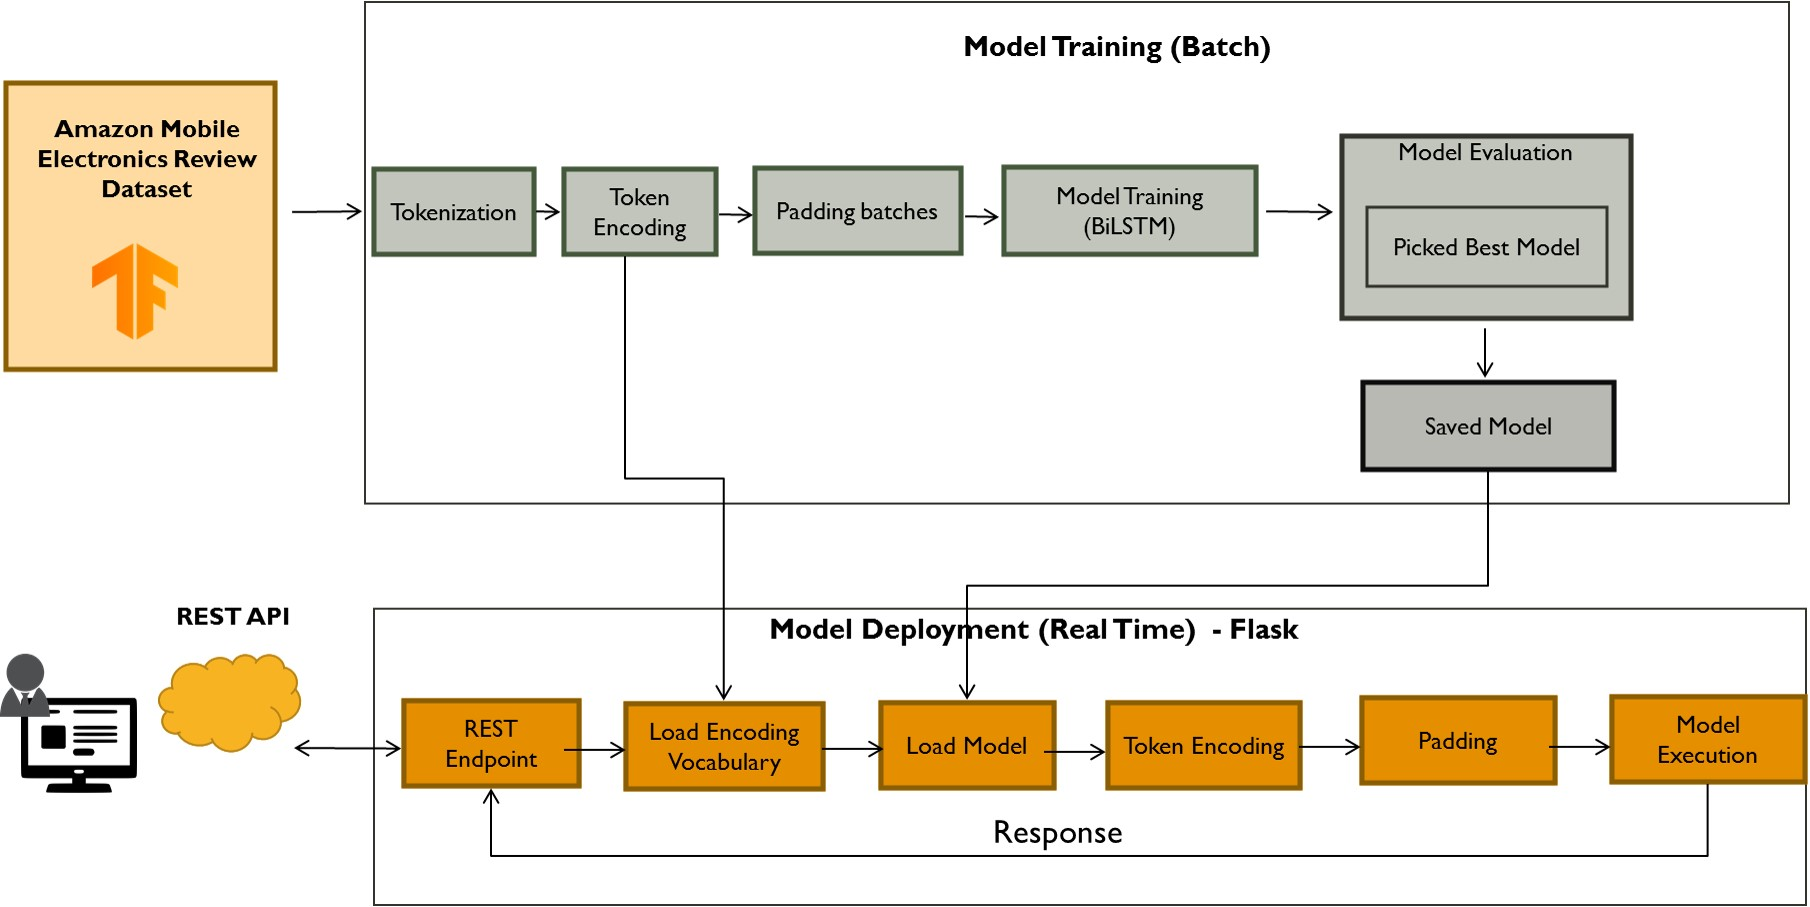![alt text](https://drive.google.com/uc?id=1nTQUgFgBUhpo4AwZmK5081JkqoMN7Xas)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/models/'

final_sentiment_analysis.hdf5  sentiment_analysis.hdf5
sa_encoder.vocab.tokens        sentiment_analysis.hdf51
sa_encoder.vocab.tokens1


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


In [ ]:
print(tf.__version__)

2.1.0


In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/models/sentiment_analysis.hdf5')
print(model.outputs)

[<tf.Tensor 'dense_11/Identity:0' shape=(None, 1) dtype=float32>]


In [ ]:
print(model.inputs)

[<tf.Tensor 'embedding_2_input:0' shape=(None, None) dtype=float32>]


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         9438720   
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)               

In [ ]:
model.get_weights()

[array([[-0.04629749,  0.01110122, -0.03263856, ...,  0.03305478,
          0.05579415,  0.03214427],
        [-0.04206273, -0.05558819, -0.01833712, ..., -0.01560727,
          0.06167749, -0.00132483],
        [ 0.00293742,  0.03017613, -0.05452958, ..., -0.02469147,
          0.05835793,  0.05551361],
        ...,
        [-0.04581881,  0.04027994,  0.00380965, ...,  0.01255488,
          0.00666949,  0.04146244],
        [ 0.03165385, -0.02949343, -0.03873481, ..., -0.01048608,
          0.02723416,  0.01732886],
        [-0.03989124, -0.02672502,  0.01777582, ..., -0.04596042,
          0.04822646,  0.04781136]], dtype=float32),
 array([[-0.1087565 ,  0.00725023, -0.00725317, ..., -0.13343191,
         -0.04476446, -0.07642907],
        [ 0.04909128,  0.07869313, -0.07312109, ..., -0.09178353,
         -0.01334419, -0.07912165],
        [ 0.04738641,  0.06753984,  0.02692822, ...,  0.01726119,
          0.08938981,  0.04791883],
        ...,
        [-0.10809879, -0.02525443,  0.0

In [ ]:
emb_layer=model.get_layer(index=0)

In [ ]:
emb_layer.output_shape

(None, None, 128)

In [ ]:
emb_weights=emb_layer.get_weights()[0]
emb_weights.shape

(73740, 128)

In [ ]:
lstm1_layer=model.get_layer(index=1)

In [ ]:
lstm1_layer.output_shape

(None, None, 256)

In [ ]:
lstm1_layer.weights

[<tf.Variable 'bidirectional_5/forward_lstm_5/kernel:0' shape=(128, 512) dtype=float32, numpy=
 array([[-0.1087565 ,  0.00725023, -0.00725317, ..., -0.13343191,
         -0.04476446, -0.07642907],
        [ 0.04909128,  0.07869313, -0.07312109, ..., -0.09178353,
         -0.01334419, -0.07912165],
        [ 0.04738641,  0.06753984,  0.02692822, ...,  0.01726119,
          0.08938981,  0.04791883],
        ...,
        [-0.10809879, -0.02525443,  0.0285022 , ...,  0.16985697,
          0.05318509, -0.01092821],
        [ 0.06007785, -0.04516843,  0.0456744 , ...,  0.12330289,
          0.01619206,  0.15889642],
        [ 0.06474997, -0.08735643, -0.00954457, ...,  0.07794626,
         -0.03463706,  0.15487759]], dtype=float32)>,
 <tf.Variable 'bidirectional_5/forward_lstm_5/recurrent_kernel:0' shape=(128, 512) dtype=float32, numpy=
 array([[ 0.00890297,  0.0367904 ,  0.04311248, ..., -0.04280928,
          0.01316974, -0.04825889],
        [-0.04523464,  0.00348579, -0.07172167, ..., -0

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/models/final_sentiment_analysis.hdf5')
text_encoder = tfds.features.text.TokenTextEncoder.load_from_file("/content/drive/My Drive/Colab Notebooks/models/sa_encoder.vocab")

In [ ]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def predict_fn(pred_text, pad_size):
  encoded_pred_text = text_encoder.encode(pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, pad_size)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.int64)
  predictions = model.predict(tf.expand_dims(encoded_pred_text, 0))

  return (predictions)

In [ ]:
pred_text = ('Unfortunately this product did not come with the CD nor did the pages go in order. The pages were misleading which made the flow of the content even more challenging to follow (started with Part IV vs Part I). I got this as a Xmas present for my partner and he was disappointed to put it lightly. I will be looking into how I can get my money back on this item and how I can return it.')
predictions = predict_fn(pred_text, 1000)
print(predictions)

[[-7.519889]]


In [ ]:
pred_text = ('Both the original content and the additional content in his edition are great. However, the additional content has been added at the expense of eleven chapters and the appendix, which you must use an included CD to access. The CD however does not even contain the chapters themselves, but a link to a webpage from which to download them. I purchase physical copies of nonfiction books because the formatting is generally superior to e-book versions, making them easier to read. This has been particularly counter-productive in this instance, as not only is it annoying to have to switch, but the missing chapters seem to have been removed almost at random. Also, the provided digital chapters are .pdf files instead of e-book files, so reading them is actually worse than reading a normal e-book.')
predictions = predict_fn(pred_text, 1000)
print(predictions)

[[-2.784692]]


In [ ]:
pred_text = ('Still working my way through it but definitely changes your view on investment. Wish it was available on Audible')
predictions = predict_fn(pred_text, 1000)
print(predictions)

[[2.3042152]]


In [ ]:
pred_text = ("Consistent in its service and quality of food. The items weve tried have always been very tasty. Cool ambiance and vibe.")
predictions = predict_fn(pred_text, 1000)
print(predictions)

[[0.6921133]]


In [ ]:
pred_text = ("I sat there for 10 min and never got offered the menu or anything to drink. We didn't get any kind of attention even though there were only 3 more customers")
predictions = predict_fn(pred_text, 1000)
print(predictions)

[[-2.9662268]]


--------------------------------------------------------